In [5]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd



2.8.2


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0,:,:] == x_train[:1]


array([[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  Tr

28
28


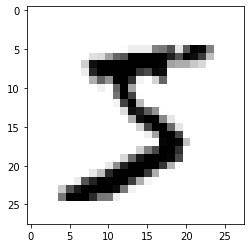

In [ ]:
print(len(x_train[0]))
print(len(x_train[0][0]))
plt.imshow(x_train[0], cmap=plt.cm.binary); plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(10)
]) #if adding one more 128-neuron layer plus 0.2-dropout, the result is still 97%, not better

predictions = model(x_train[:1]).numpy()
print( predictions )

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #the definition of Categorical Crossentropy ??
print( loss_fn(y_train[:1], predictions).numpy() )

[[ 0.74364555 -0.9143207   0.88126934  0.24252607  0.26005316 -0.01342946
  -0.5050151   0.74268097  0.05103614 -0.19461223]]
2.5827568


In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn, #cannot use 'sparse_categorical_crossentropy' here
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1437 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1075 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0899 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9756


In [ ]:
pred = model(x_train[:1]).numpy()
print(tf.nn.softmax(pred).numpy())
print(y_train[:1])

[[2.9327285e-12 6.1825062e-08 1.0035519e-06 2.8122053e-02 2.7283669e-17
  9.7187680e-01 1.5115581e-12 9.8224362e-09 4.0862248e-11 2.5853167e-08]]
[5]


In [ ]:
model_1 = tf.keras.models.Sequential()
model_1.add( tf.keras.layers.Flatten(input_shape=(28, 28)) )
model_1.add( tf.keras.layers.Dense(128, activation=tf.nn.relu) )
model_1.add( tf.keras.layers.Dense(128, activation=tf.nn.relu) )
model_1.add( tf.keras.layers.Dense(10, activation=tf.nn.softmax) ) #how does softmax work??

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2266 - accuracy: 0.9326
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0973 - accuracy: 0.9696
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9793


In [ ]:
#why all 0.085 and 0.231 ?
pred = model_1(x_train[:1]).numpy()
print(tf.nn.softmax(pred).numpy())
print(y_train[:1])
print('--------------------')
pred = model_1(x_train[2:3]).numpy()
print(tf.nn.softmax(pred).numpy())
print(y_train[2:3])
print('--------------------')
pred = model_1(x_test[:1]).numpy()
print( tf.nn.softmax(pred).numpy() )
print(y_test[:1])

[[0.08536308 0.08536506 0.08536314 0.08554117 0.08536308 0.23155227
  0.08536308 0.08536308 0.08536308 0.08536308]]
[5]
--------------------
[[0.08533914 0.08533967 0.08533971 0.08533948 0.23193191 0.08534151
  0.08534224 0.08534199 0.08533921 0.08534507]]
[4]
--------------------
[[0.08557002 0.08557012 0.08560478 0.08714023 0.08556988 0.08557025
  0.08556988 0.22823437 0.08559899 0.08557147]]
[7]


In [ ]:
val_loss, val_acc = model_1.evaluate(x_test, y_test)
print( val_loss, val_acc )

313/313 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9725
0.09099985659122467 0.9725000262260437


In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_2.compile(optimizer='adam',
              loss=scce,
              metrics=['accuracy'])

NameError: ignored

In [ ]:
model_2.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2547 - accuracy: 0.9270
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1135 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.9761


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

The following shows how to access files in your google drive.
All the files and folders of your GDrive are accessible from a folder called “My Drive”. After you have mounted your Drive (as mentioned above), it will be accessible from the path /content/gdrive/My Drive/<folder/file>.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df = pd.read_csv('/content/gdrive/My Drive/Colab/diabetes.csv') 

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
